<a href="https://colab.research.google.com/github/atulhari/network-practice/blob/main/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
import h5py

%matplotlib inline

In [ ]:
train_x_orig = np.random.randint(0,256, [209,64,64,3], dtype=np.uint8)
test_x_orig = np.random.randint(0,256, [50,64,64,3], dtype=np.uint8)
y_train = np.random.choice([0,1], size=(1,209))
y_test = np.random.choice([0,1], size=(1,50))
# train_y, test_x_orig, test_y, classes = load_dataset()

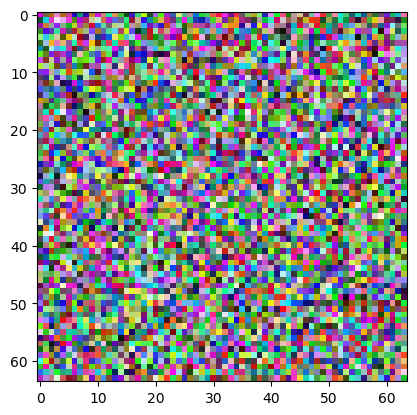

In [ ]:
m_train = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]
num_px = train_x_orig.shape[1]
# train_x_orig is (m,num_px,num_px,3) array
plt.imshow(train_x_orig[1])


In [ ]:
x_train_flat  = train_x_orig.reshape(num_px*num_px*3,m_train)
# Its common practice to normalise the input vector in machine learning. Its done by (x- x_mean)/x_std_dev
# But in the case of images, it can be just dividing it by the max value possible 255. Then the value 0 becomes 0 and value 255 becomes 1 after normalisation.
x_train = x_train_flat/255

x_test_flat =  test_x_orig.reshape(num_px*num_px*3, m_test)
x_test = x_test_flat/255
print(x_test.shape)

(12288, 50)


In [ ]:
# Helper functions

def sigmoid(z):
    """
    Computes the sigmoid z

    Arguments:
    z -- A scalar or numpy array of any size

    Returns:
    s -- sigmoid(z)
    """
    s = 1/(1 + np.exp(-z))
    return s

def initialise_with_zeros(dims):
    """
    creates a vector of zeros of shape (dims,1) for w and initialises b to 0

    Arguments:
    dims -- size of the w vector

    Returns:
    w --  zero vector of shape (dims,1)
    b -- zero scalar
    """
    w = np.zeros((dims,1))
    b = 0
    assert(w.shape == (dims,1))
    assert(isinstance(b,float) or isinstance(b,int))
    return w,b

def propagate(w,b,X,Y):
    """
    Implements the cost function and its gradient for propagation
    """
    m = X.shape[1]
    z = np.dot(w.T,X) + b
    A = sigmoid(z)
    cost = np.sum(-Y*np.log(A) - (1-Y)*np.log(1-A))/m
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m
    cost = np.squeeze(cost)
    assert(cost.shape== ())
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    grads = {"dw": dw,
             "db": db}
    return grads, cost


In [ ]:
# print(x_train.shape)

# w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
# grads, cost = propagate(w, b, X, Y)
# print ("dw = " + str(grads["dw"]))
# print ("db = " + str(grads["db"]))
# print ("cost = " + str(cost))

In [ ]:
def optimize(w,b,X,Y, num_iterations, learning_rate, print_cost=True):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate*dw
        b = b - learning_rate*db
        if i%100 == 0:
            costs.append(cost)
        if i%100==0 and print_cost:
            print("Cost after Iteration %i: %f", i, cost)

    grads = {"dw": dw,
             "db": db}
    params = {"w": w,
              "b": b}
    return params, grads, costs

In [ ]:
# print(costs)
# import matplotlib.pyplot as plt
# plt.plot(costs)

In [ ]:
def predict(w,b,X):
    print("css", X.shape)
    m = X.shape[1]
    Y_predict = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    assert(w.shape == (X.shape[0],1))
    A = sigmoid(np.dot(w.T,X) + b)
    Y_predict = (A>=0.5)*1.0
    assert(Y_predict.shape == (1,m))
    return Y_predict


In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w,b = initialise_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w,b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_predict_train = predict(w, b, X_train)
    Y_predict_test = predict(w, b, X_test)

    print("Train accuracy: {}%".format(100 - np.mean(np.abs(Y_predict_train - Y_train))*100))
    print("Test accuracy: {}%".format(100 - np.mean(np.abs(Y_predict_test -Y_test))*100))

    d = {"costs": costs,
         "Y_predict_train": Y_predict_train,
         "Y_predict_test": Y_predict_test,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    return d


In [ ]:
d = model(x_train , y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = False)

css (12288, 209)
css (12288, 50)
Train accuracy: 100.0%
Test accuracy: 54.0%
